# Lab3 - Classical package: H. Wickham’s ggplot2 Vignette

### References:
#### 1. Lab3.pdf
#### 2. ggplot2 vignette: http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html
#### 3. CSV files - https://cran.r-project.org/doc/manuals/R-data.pdf or http://rprogramming.net/read-csv-in-r/

#### Include necessary Libraries

In [2]:
#install.packages("ggrepel", dependencies=TRUE, repos='http://cran.rstudio.com/')
#install.packages("ez", dependencies = TRUE, repos='http://cran.rstudio.com/')
library(ggplot2)
library("ggrepel")
library(ez)
library(scales)

Installing package into 'C:/Users/Ajay-Pc/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ajay-Pc\AppData\Local\Temp\RtmpE5swU6\downloaded_packages


Warning message:
"package 'ggrepel' was built under R version 3.3.3"Warning message:
"package 'ez' was built under R version 3.3.3"

### Begin with Example Data:
#### Housing Prices:

In [10]:
housing <- read.csv("Rgraphics/dataSets/landdata-states.csv")
head(housing[1:5])

State,region,Date,Home.Value,Structure.Cost
AK,West,2010.25,224952,160599
AK,West,2010.50,225511,160252
AK,West,2009.75,225820,163791
AK,West,2010.00,224994,161787
AK,West,2008.00,234590,155400
AK,West,2008.25,233714,157458


### Compare ggplot2 vs Base for simple graphs

#### Base Graphics Histogram Example:

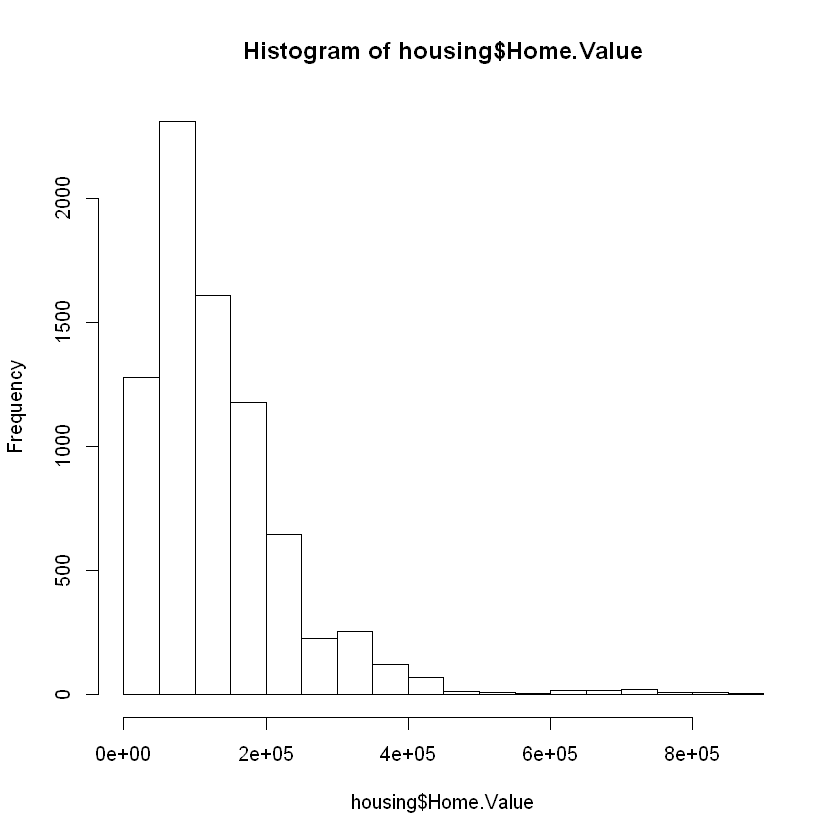

In [11]:
hist(housing$Home.Value)

#### ggplot2 Histogram Example: 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


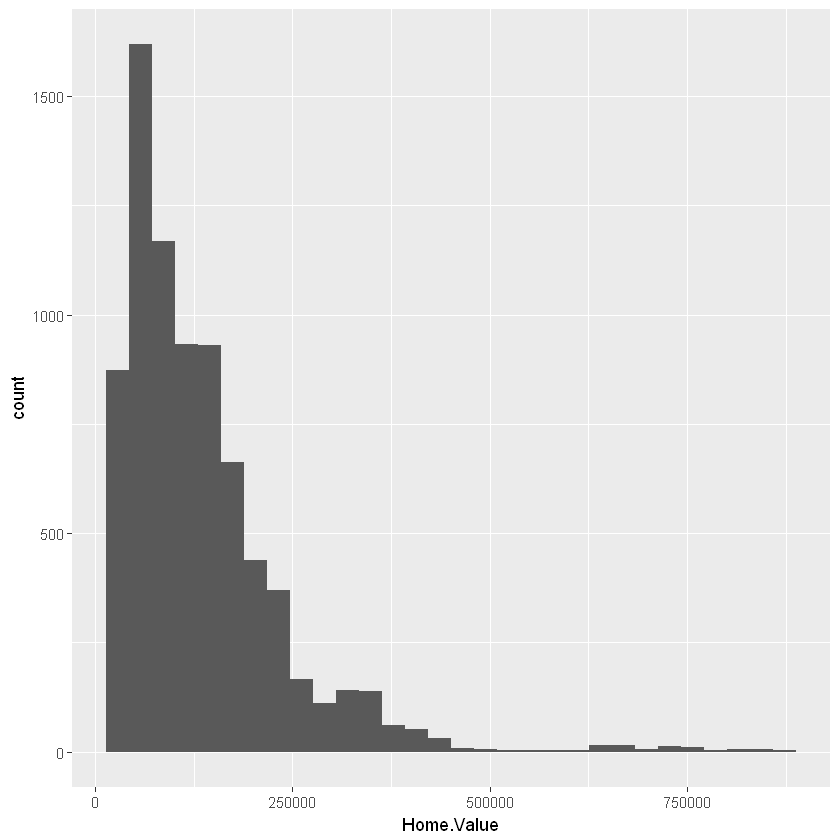

In [12]:
ggplot(housing, aes(x = Home.Value)) + geom_histogram()

Clearly, Base wins - better histogram than ggplot2

### Base graphics VS ggplot for complex graphs:

#### Base colored scatter plot example: 

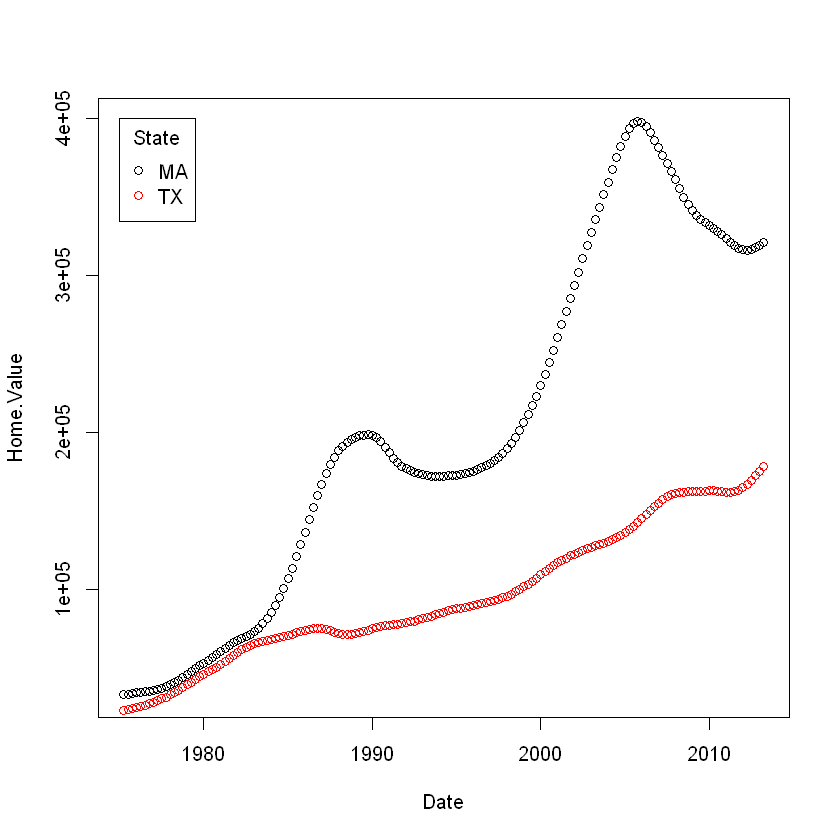

In [13]:
plot(Home.Value ~ Date,
     data=subset(housing, State == "MA"))
points(Home.Value ~ Date, col="red",
       data=subset(housing, State == "TX"))
legend(1975, 400000,
       c("MA", "TX"), title="State",
       col=c("black", "red"),
       pch=c(1, 1))

#### ggplot2 Colored Scatter Plot Example: 

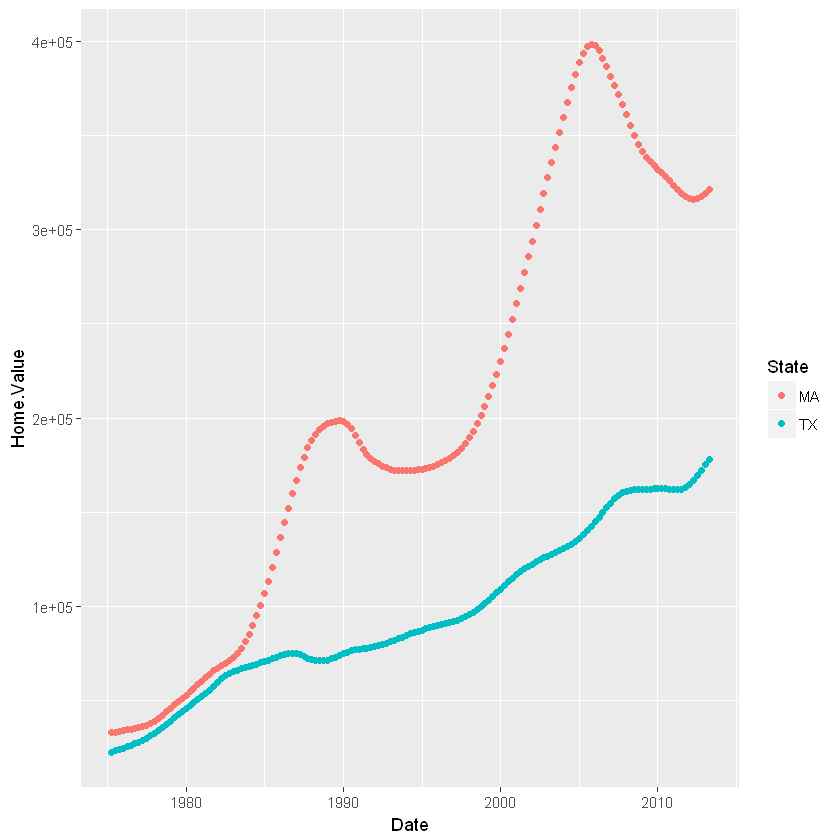

In [14]:
ggplot(subset(housing, State %in% c("MA", "TX")),
       aes(x=Date,
           y=Home.Value,
           color=State))+
  geom_point()

Clearly, ggplot2 wins - better colored scatter plot

In [15]:
help.search("geom_",package="ggplot2")


starting httpd help server ... done


## Geometrics Objects and Aesthetics

### Points (Scatterplot)

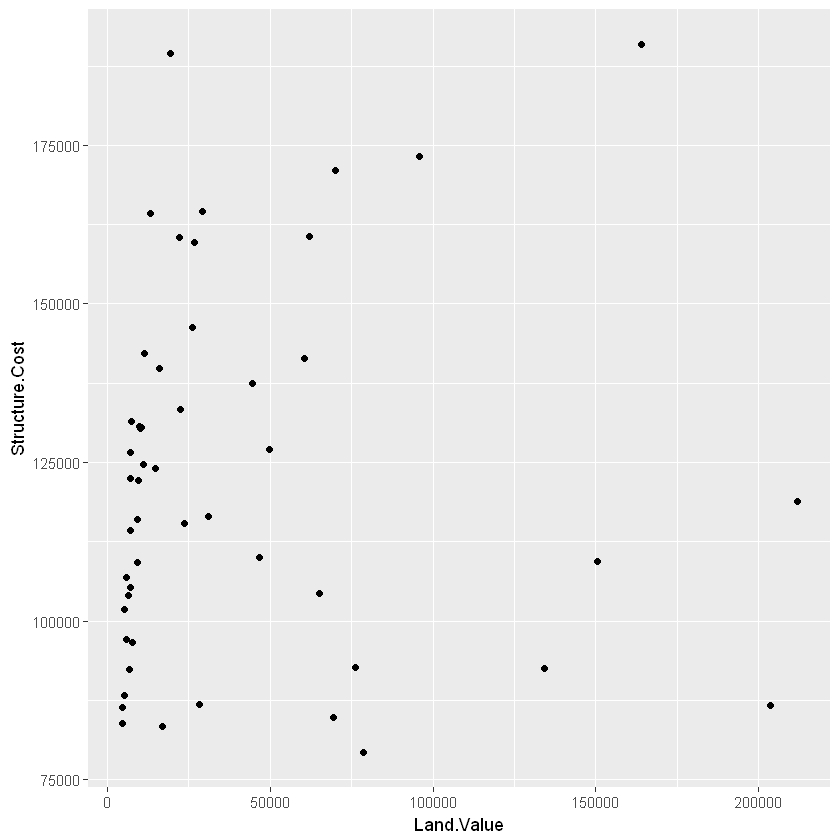

In [16]:
hp2001Q1 <- subset(housing, Date == 2001.25) 
ggplot(hp2001Q1,aes(y = Structure.Cost, x = Land.Value)) + geom_point()

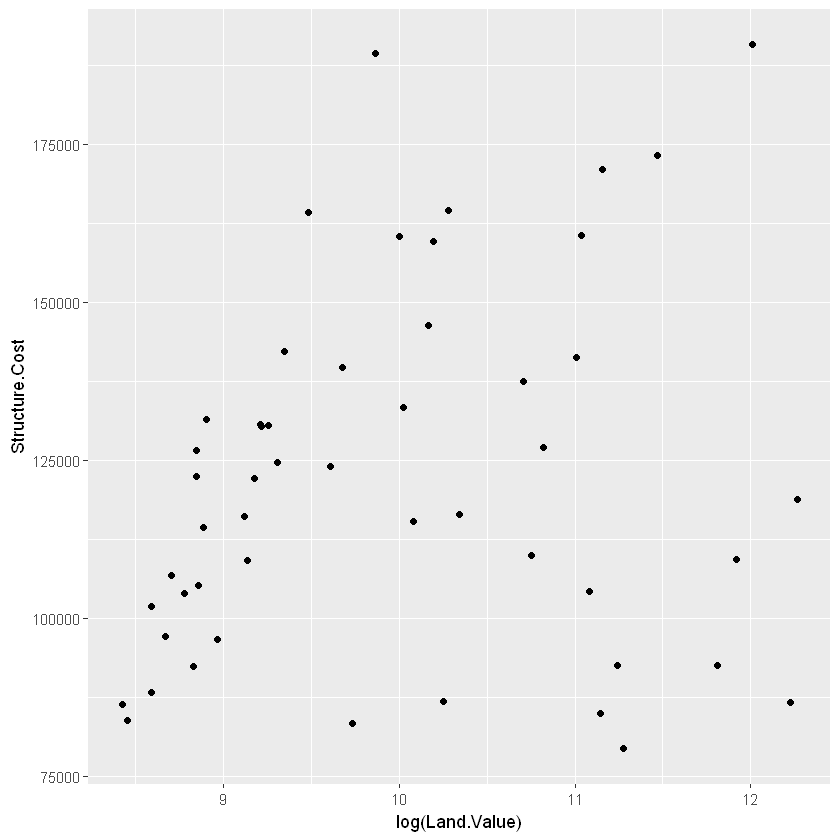

In [17]:
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = log(Land.Value))) +
  geom_point()

### Lines (Prediction Line)

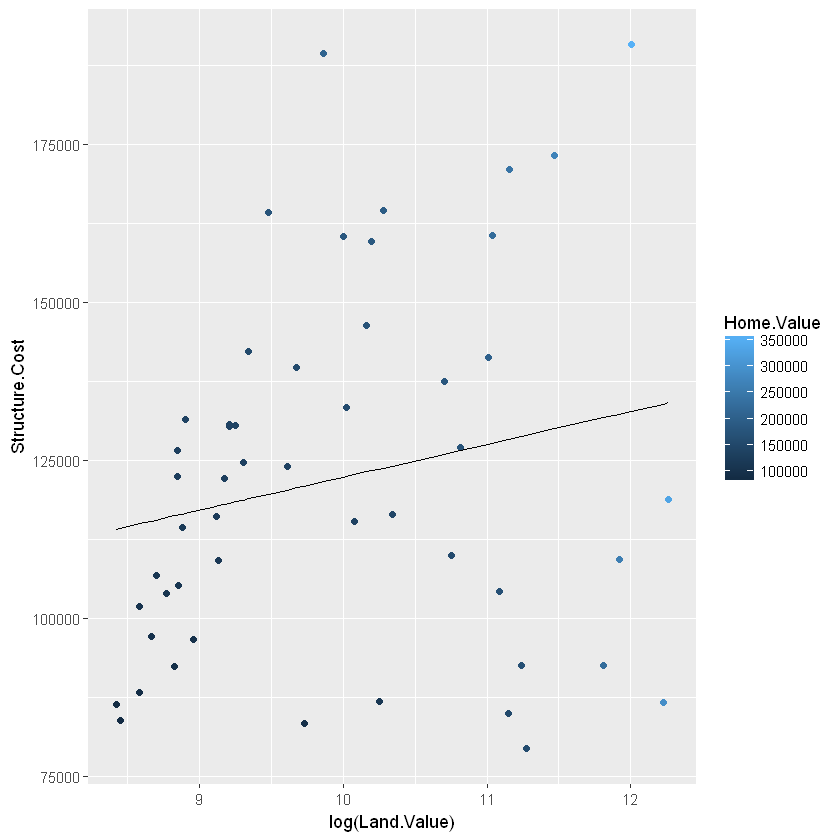

In [18]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))
p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))
p1 + geom_point(aes(color = Home.Value)) + geom_line(aes(y = pred.SC))

### Smoothers

`geom_smooth()` using method = 'loess'


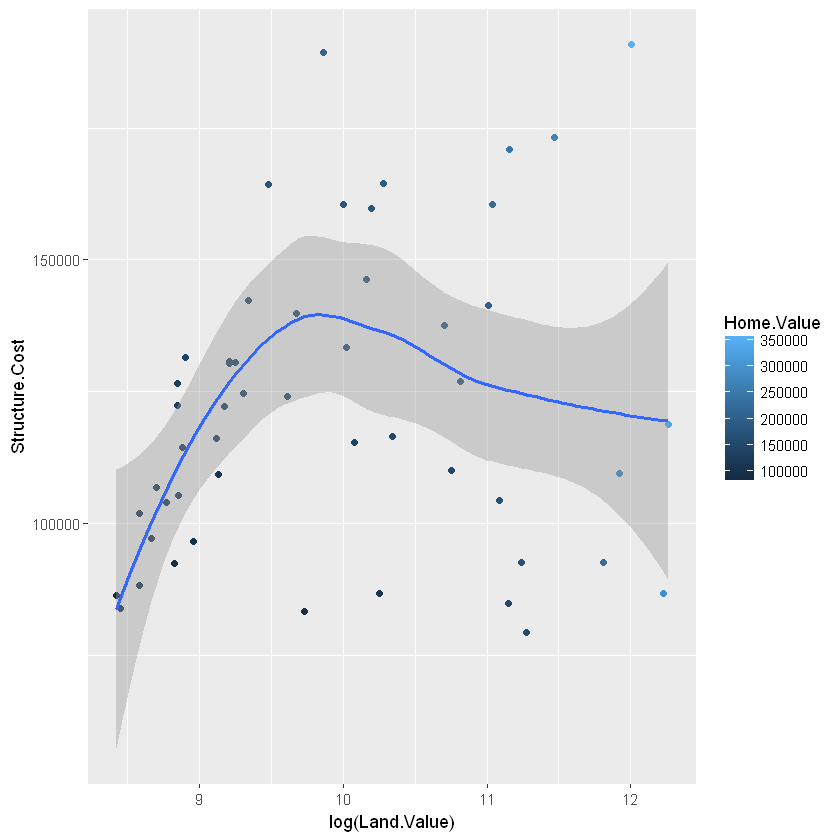

In [19]:
p1 + geom_point(aes(color = Home.Value)) + geom_smooth()

### Text (Label Points)

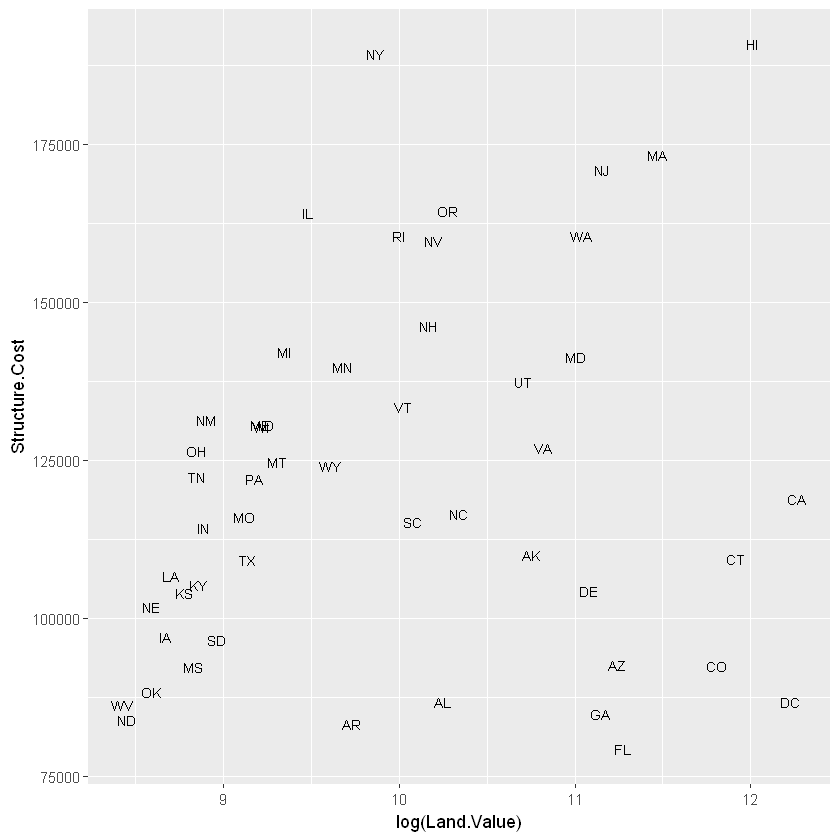

In [20]:
p1 + geom_text(aes(label=State), size = 3)

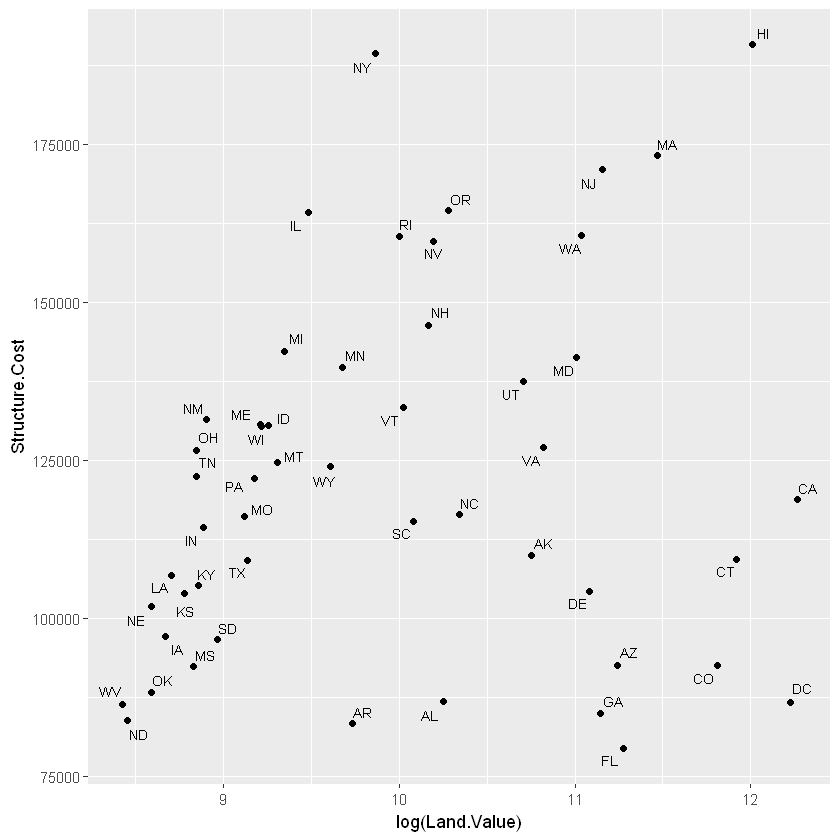

In [21]:
#Error not working - no lines coming 
p1 + geom_point() + geom_text_repel(aes(label=State), size = 3)

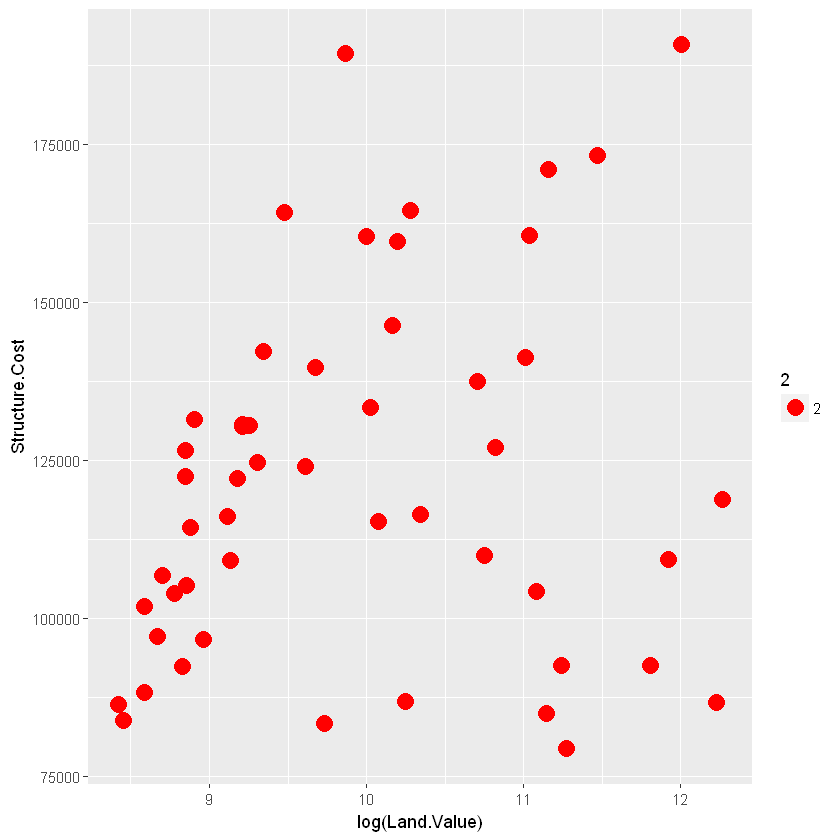

In [22]:
p1 +
  geom_point(aes(size = 2),# incorrect! 2 is not a variable
             color="red") # this is fine -- all points red

#### Mapping Variables To Other Aesthetics 

Warning message:
"Removed 1 rows containing missing values (geom_point)."

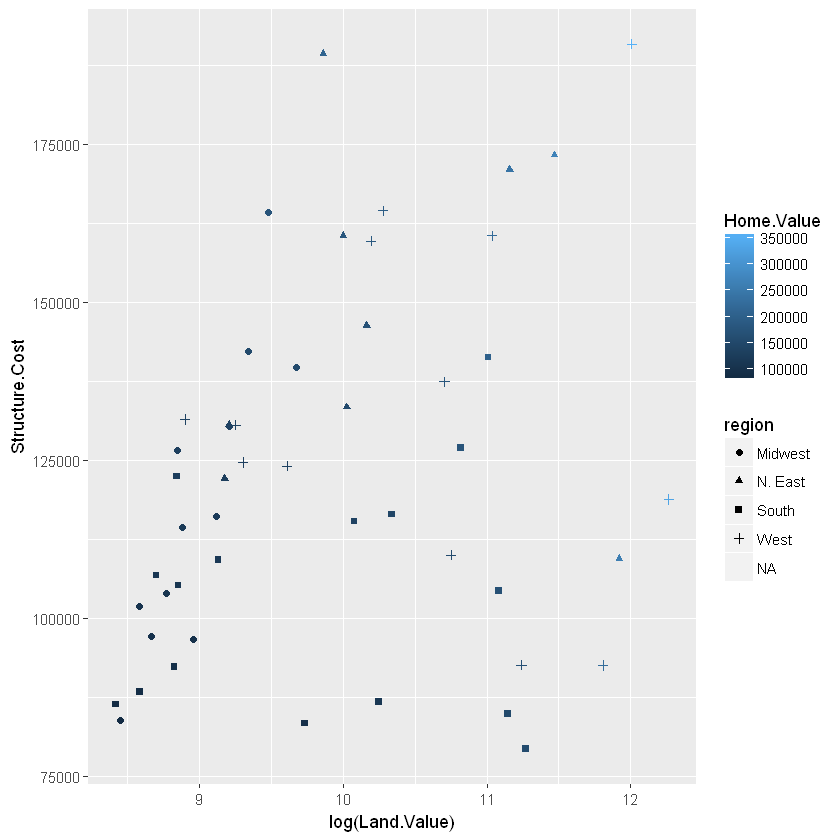

In [23]:
p1 +
  geom_point(aes(color=Home.Value, shape = region))

## Statistical Transformations

### Setting Statistical Transformation Arguments

Default Histogram: 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


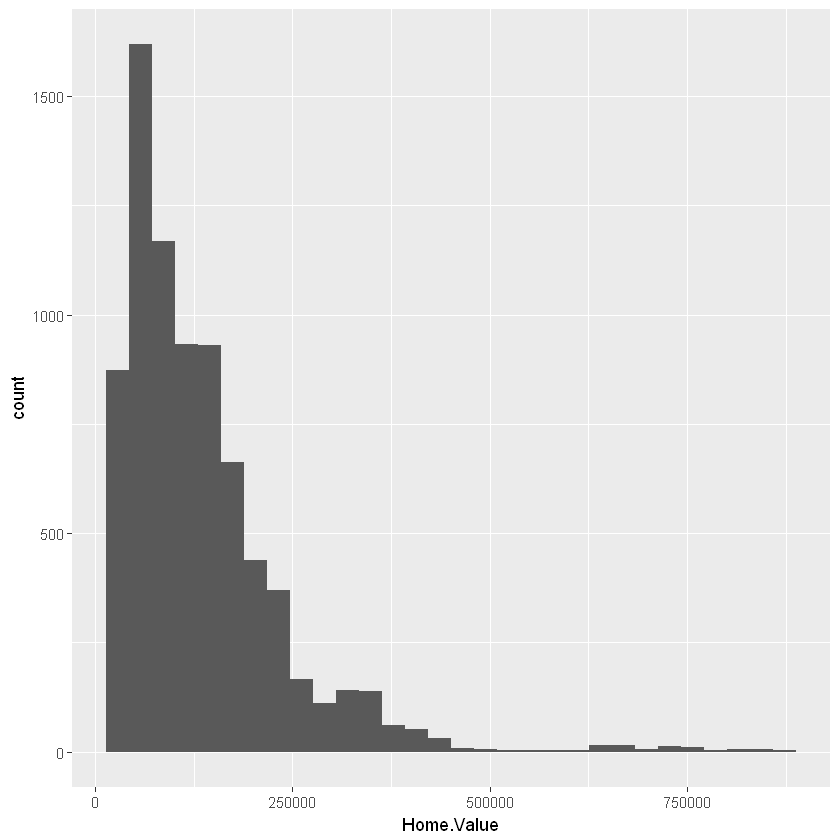

In [24]:
p2 <- ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()

Change 'binwidth' using 'stat_bin' function:

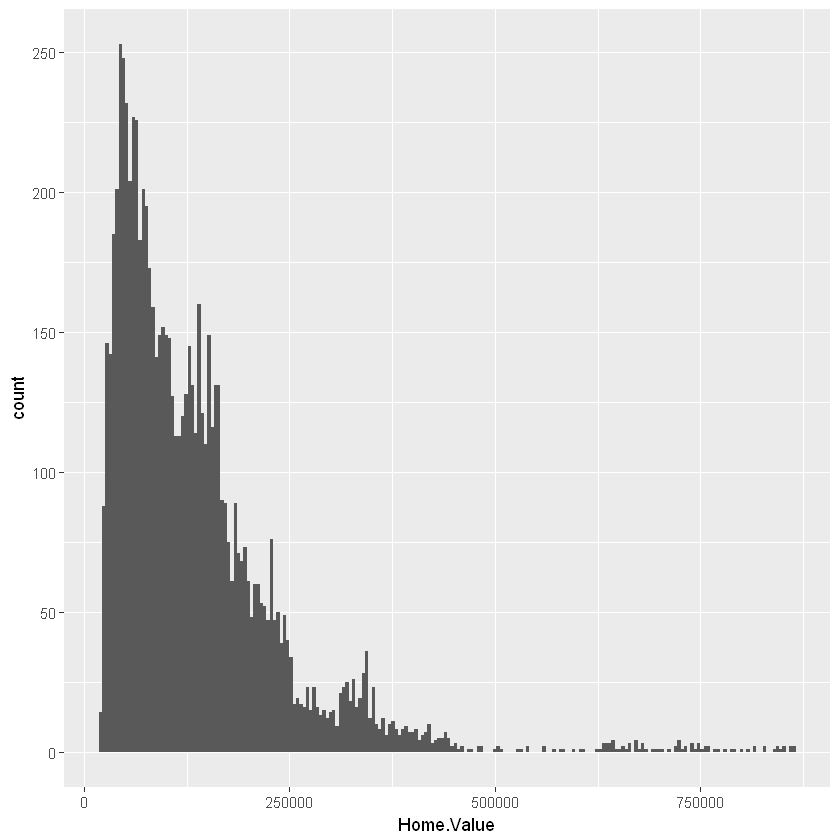

In [25]:
p2 + geom_histogram(stat = "bin", binwidth=4000)

### Changing The Statistical Transformation

In [26]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
rbind(head(housing.sum), tail(housing.sum))

,State,Home.Value
1,AK,147385.14
2,AL,92545.22
3,AR,82076.84
4,AZ,140755.59
5,CA,282808.08
6,CO,158175.99
46,VA,155391.44
47,VT,132394.60
48,WA,178522.58
49,WI,108359.45


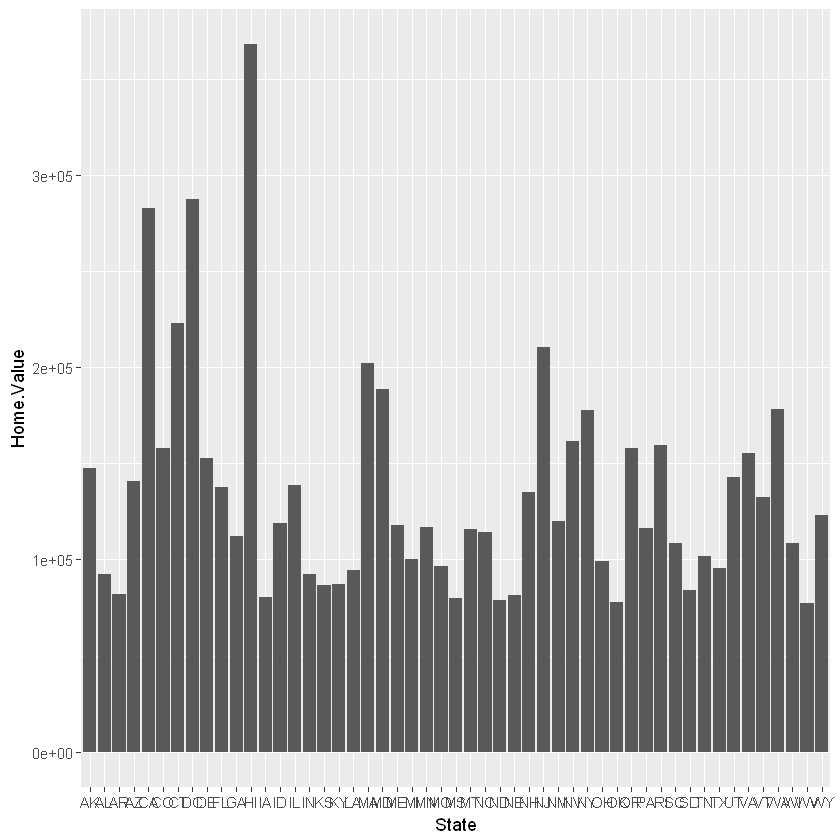

In [27]:
ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar(stat="identity")
#Here default stat = stat_count wont work

## Scales

### Scale Modification Examples



Construct a dotplot distribution of home values by Date and State

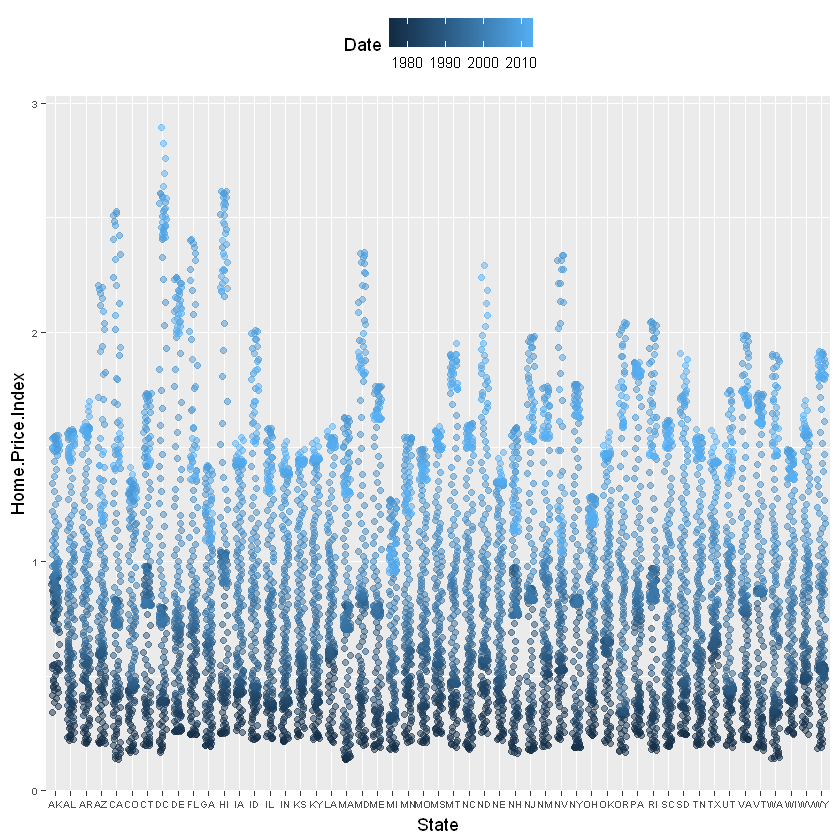

In [28]:
p3 <- ggplot(housing,
             aes(x = State,
                 y = Home.Price.Index)) + 
        theme(legend.position="top",
              axis.text=element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date),
                       alpha = 0.5,
                       size = 1.5,
                       position = position_jitter(width = 0.25, height = 0)))

Modify the breaks for x axis and color scales

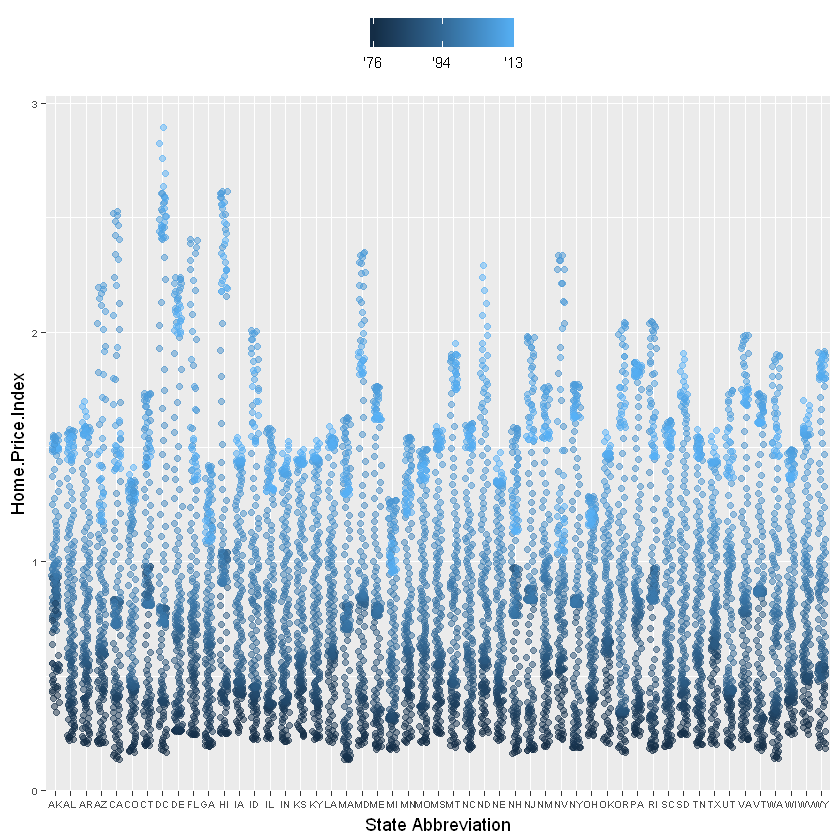

In [29]:
p4 + scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"))

 Change the low and high values to blue and red

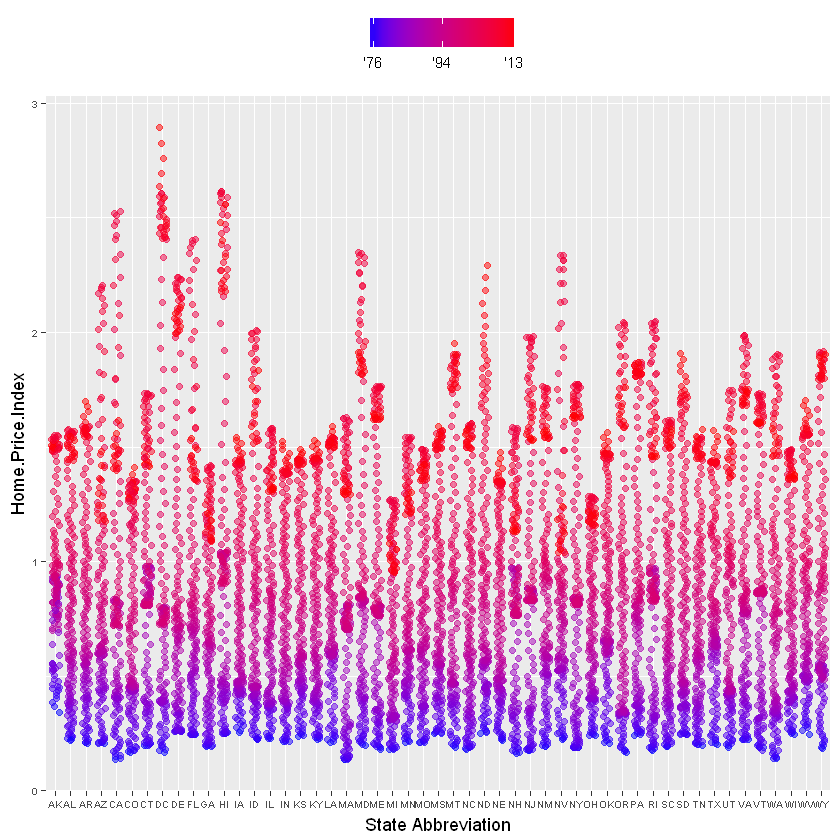

In [30]:
p4 +
  scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high = "red")

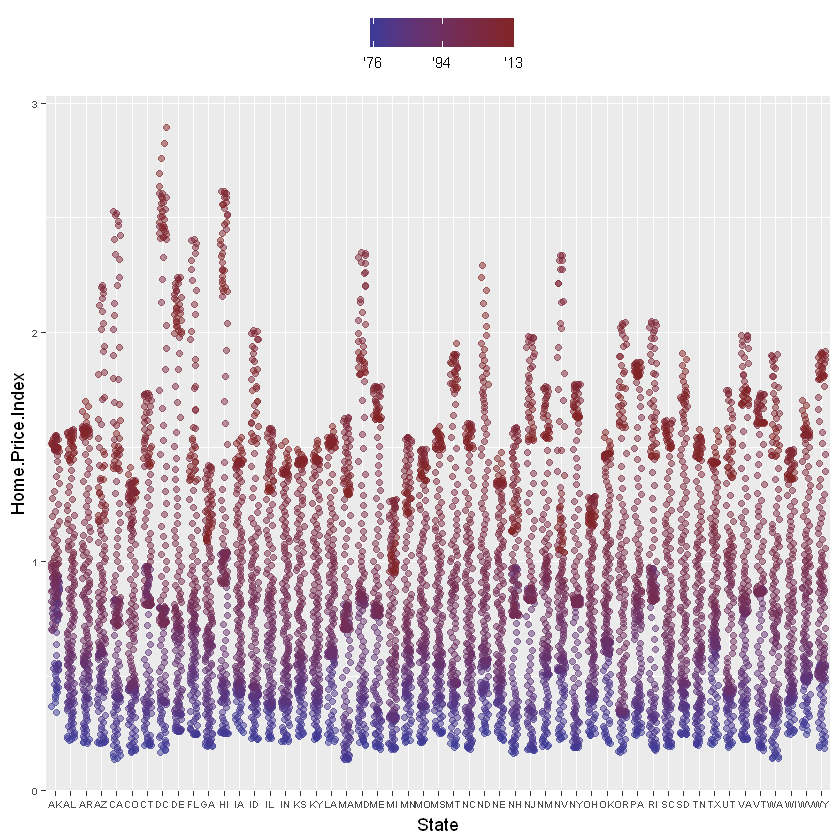

In [37]:
p4 +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = muted("blue"), high = muted("red"))


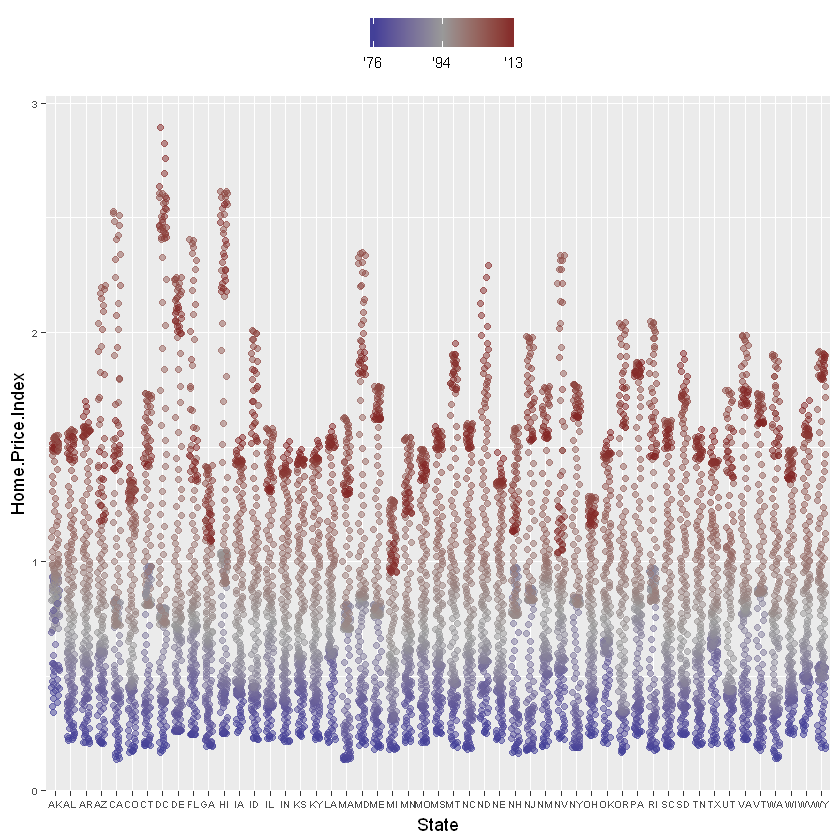

In [36]:
p4 +
  scale_color_gradient2(name="",
                        breaks = c(1976, 1994, 2013),
                        labels = c("'76", "'94", "'13"),
                        low = muted("blue"),
                        high = muted("red"),
                        mid = "gray60",
                        midpoint = 1994)

## Faceting

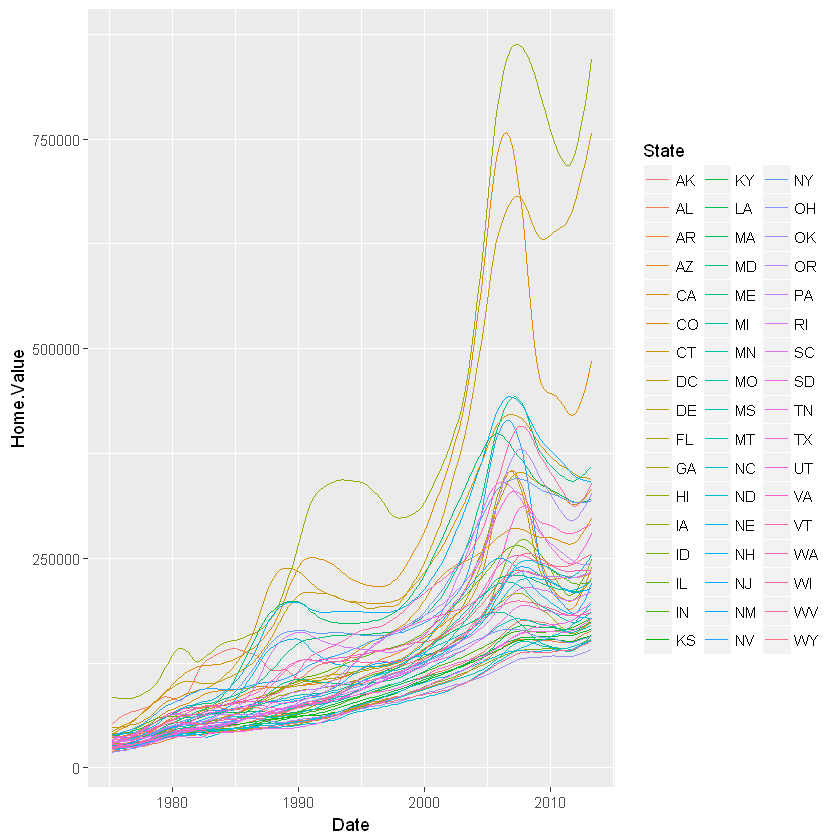

In [39]:
p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

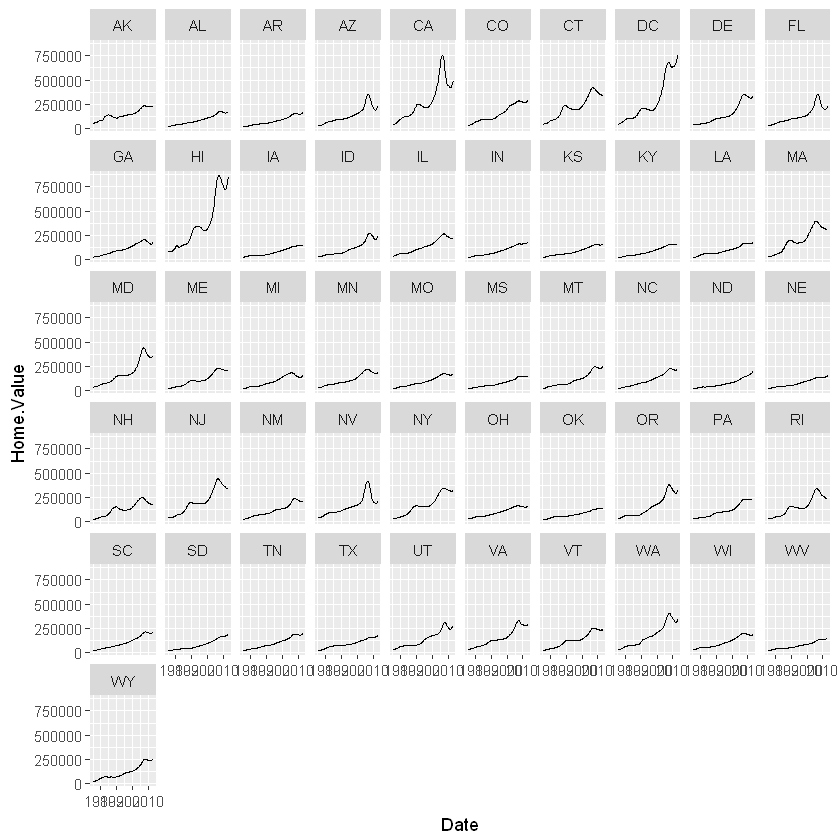

In [40]:
(p5 <- p5 + geom_line() +
   facet_wrap(~State, ncol = 10))

## Themes

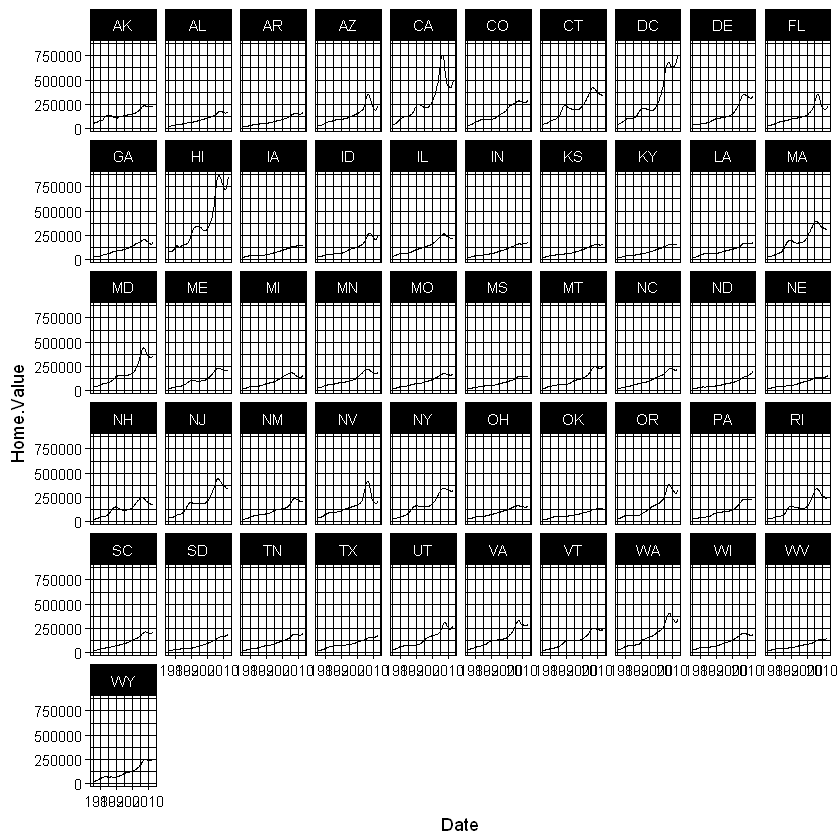

In [41]:
p5 + theme_linedraw()

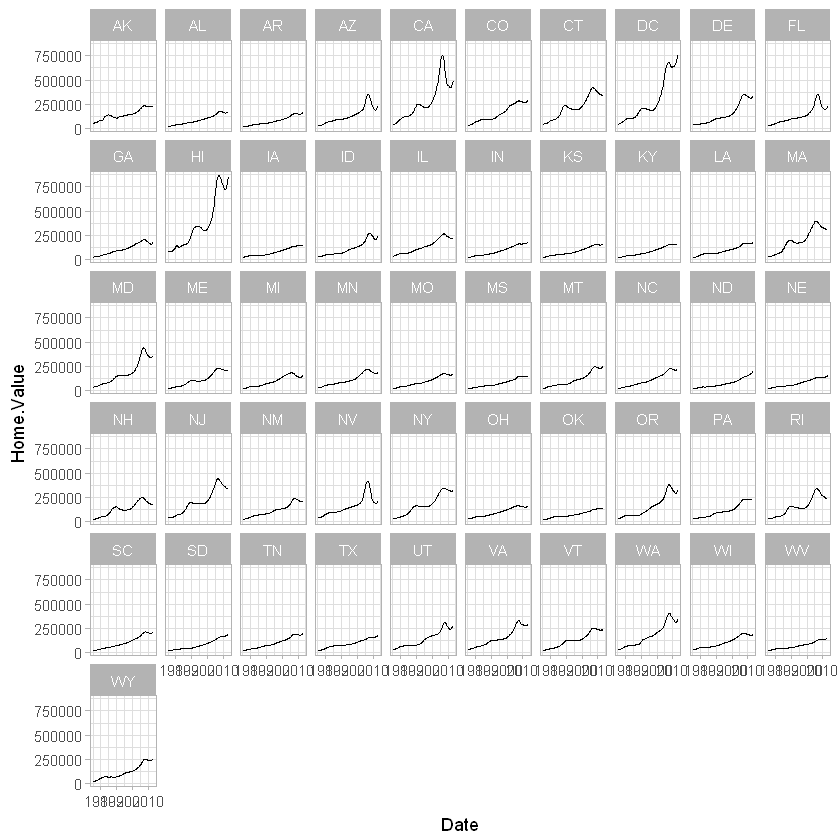

In [42]:
p5 + theme_light()

#### Overriding theme defaults

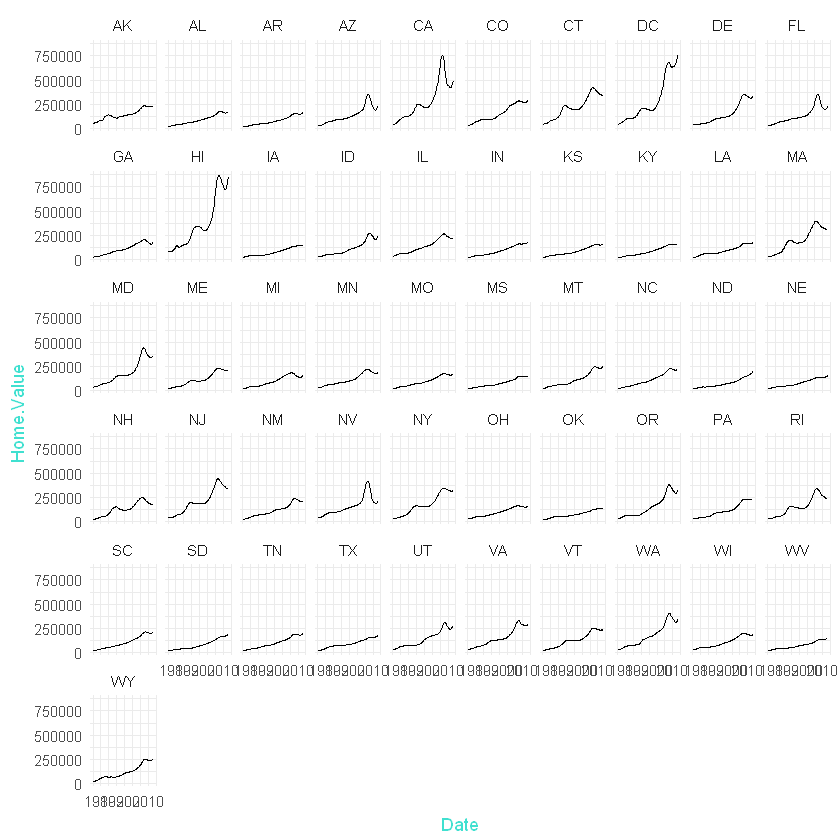

In [43]:
p5 + theme_minimal() +
  theme(text = element_text(color = "turquoise"))

#### Creating and saving new themes

Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

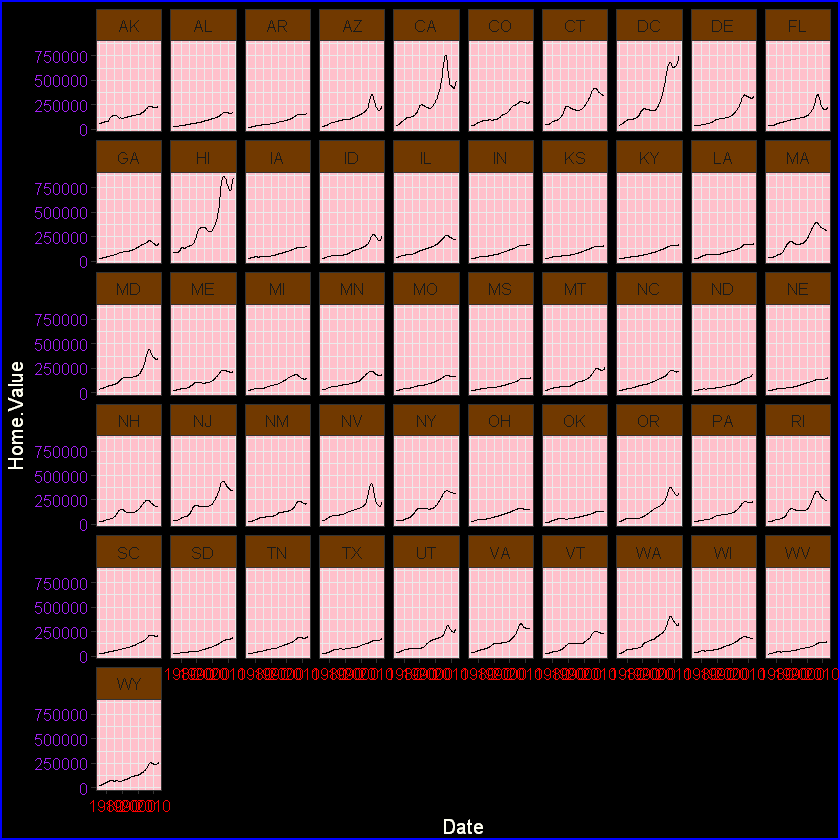

In [44]:
theme_new <- theme_bw() +
  theme(plot.background = element_rect(size = 1, color = "blue", fill = "black"),
        text=element_text(size = 12, family = "Serif", color = "ivory"),
        axis.text.y = element_text(colour = "purple"),
        axis.text.x = element_text(colour = "red"),
        panel.background = element_rect(fill = "pink"),
        strip.background = element_rect(fill = muted("orange")))

p5 + theme_new

### Map Aesthetic To Different Columns

#### Wrong

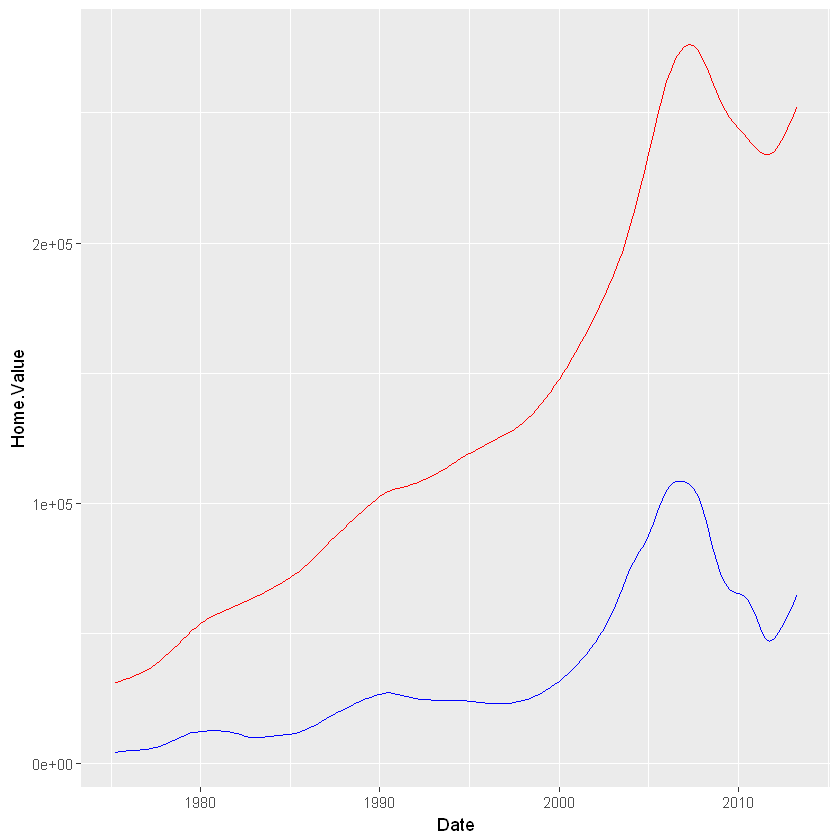

In [45]:
housing.byyear <- aggregate(cbind(Home.Value, Land.Value) ~ Date, data = housing, mean)
ggplot(housing.byyear,
       aes(x=Date)) +
  geom_line(aes(y=Home.Value), color="red") +
  geom_line(aes(y=Land.Value), color="blue")



#### Right

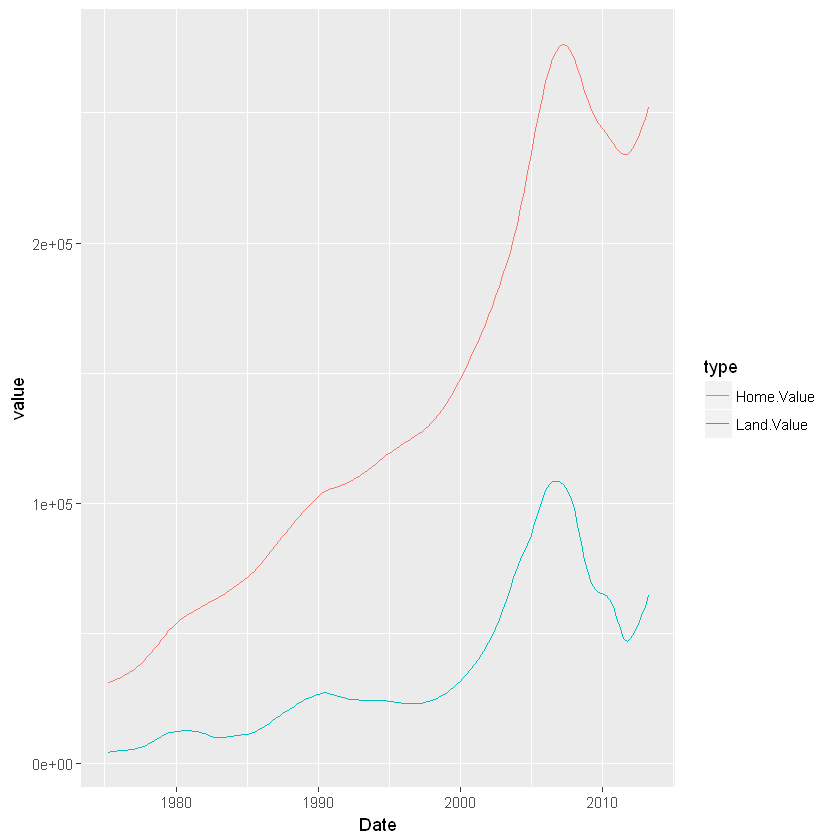

In [46]:
library(tidyr)
home.land.byyear <- gather(housing.byyear,
                           value = "value",
                           key = "type",
                           Home.Value, Land.Value)
ggplot(home.land.byyear,
       aes(x=Date,
           y=value,
           color=type)) +
  geom_line()